# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Regression questions

The idea is to have here a set of small exercises helping you to (self-)check your understanding of the concepts.

### Exercise 1

Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity? 

> Using the first $300$ lines of data contained in this [csv](https://www.kaggle.com/sohier/calcofi#bottle.csv) and `sklearn`, try to give an answer to this question.


In [1]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

In [2]:
# 1. Is there a relationship between water salinity & water temperature?

df = pd.read_csv("data/bottle.csv", low_memory=False)

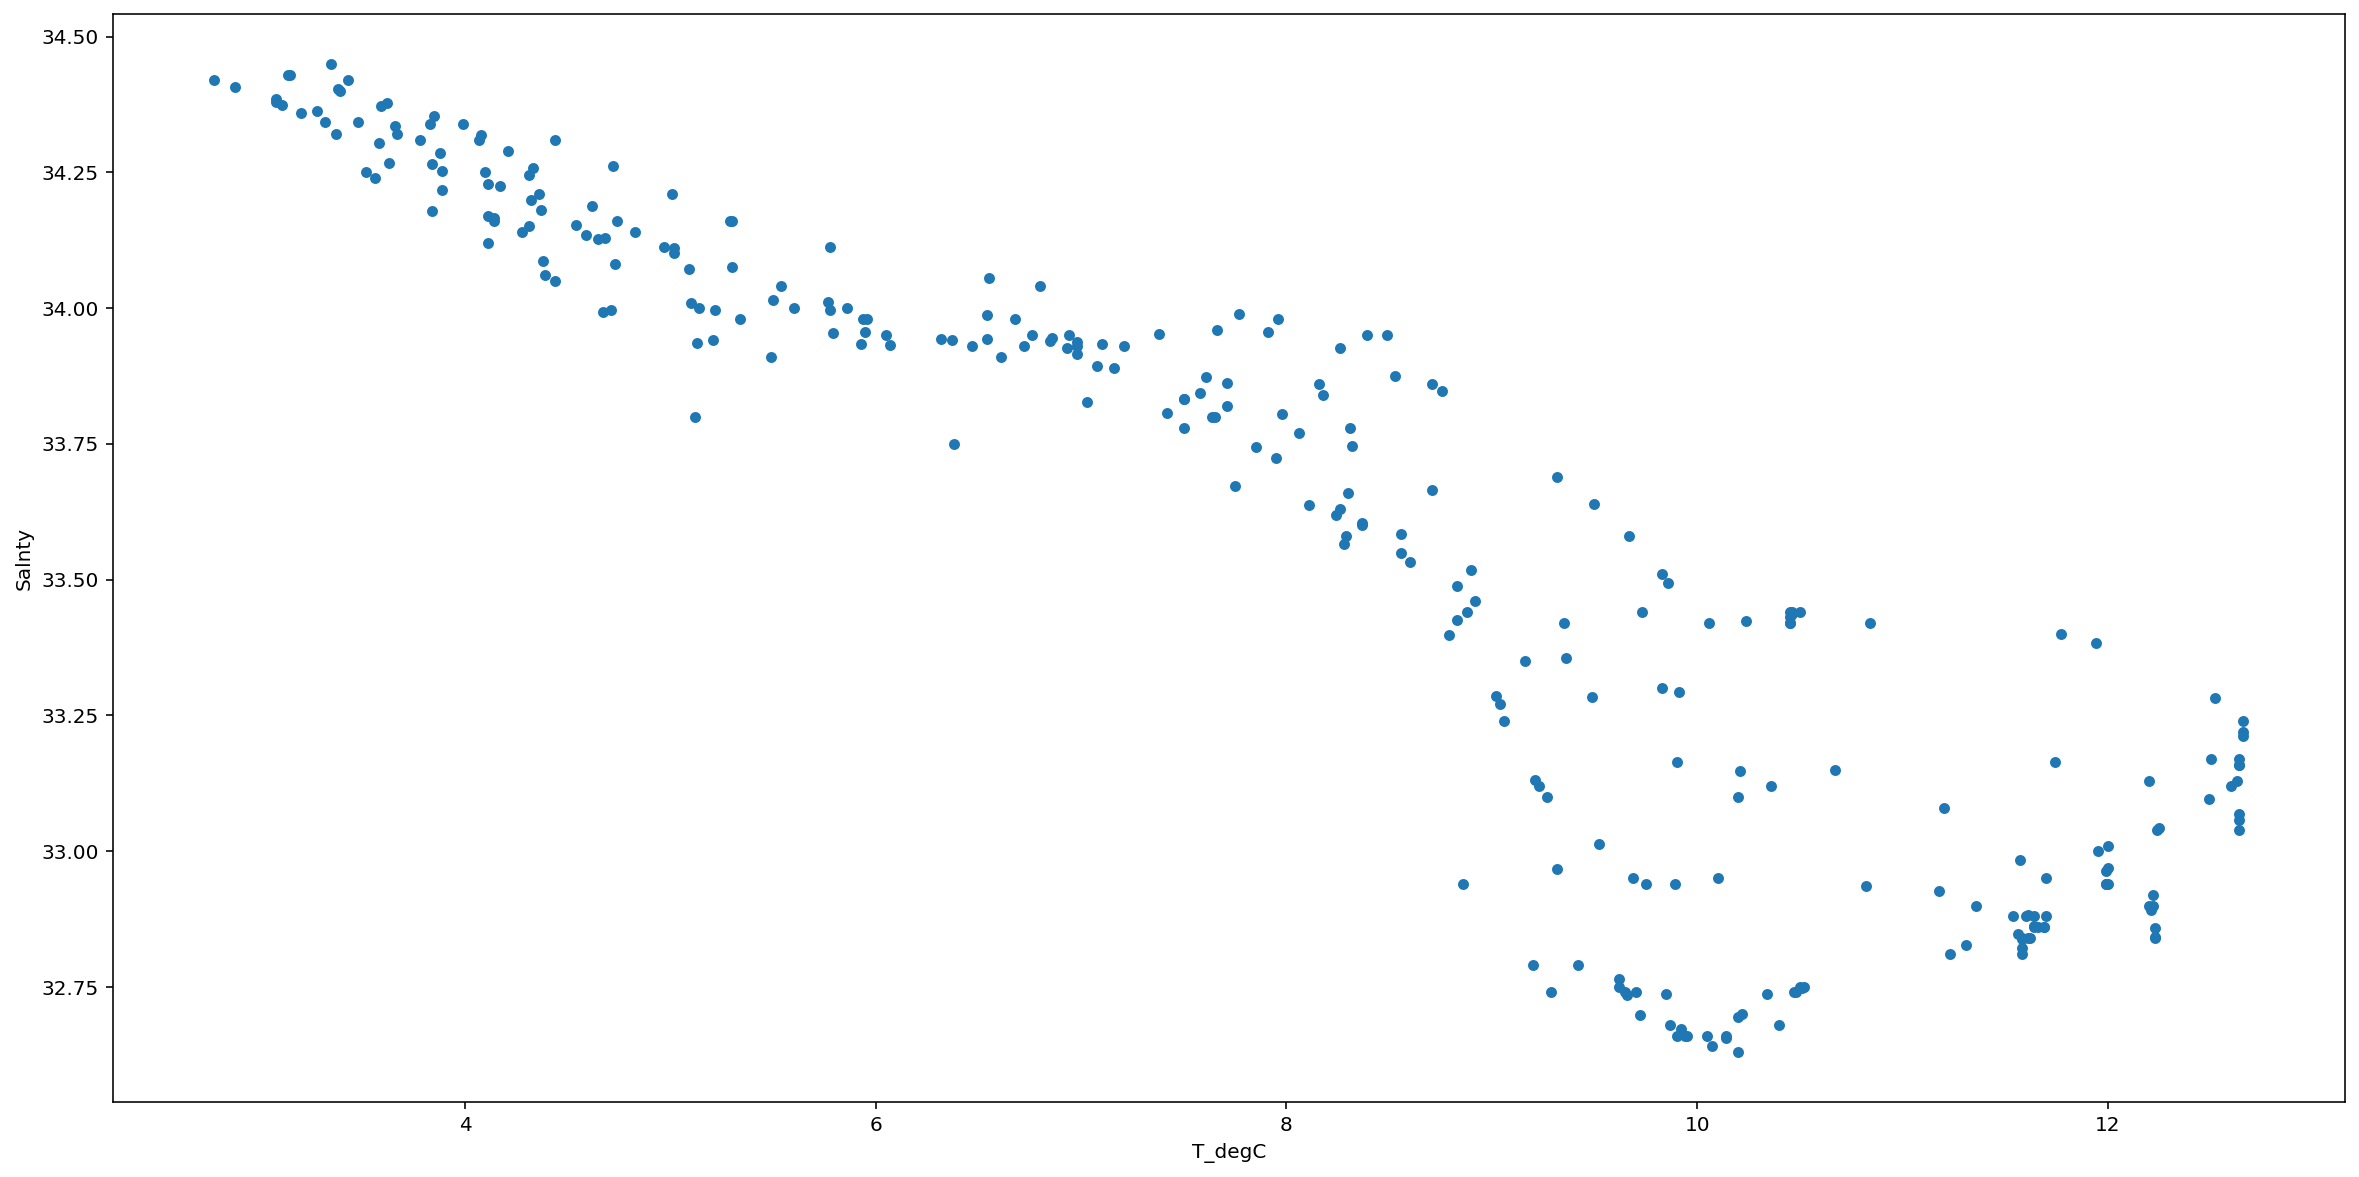

In [3]:
df_ts = df[["T_degC", "Salnty"]][:300].dropna(axis=0, how='any') #dropping rows with null values

df_ts.plot(x="T_degC", y="Salnty", kind="scatter", figsize=(20,10));

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_ts["T_degC"], df_ts["Salnty"], test_size=0.2, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))

In [7]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains 87.85% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 0.14
3) The R-Square score of the model is  0.88


Text(0, 0.5, 'Salinity')

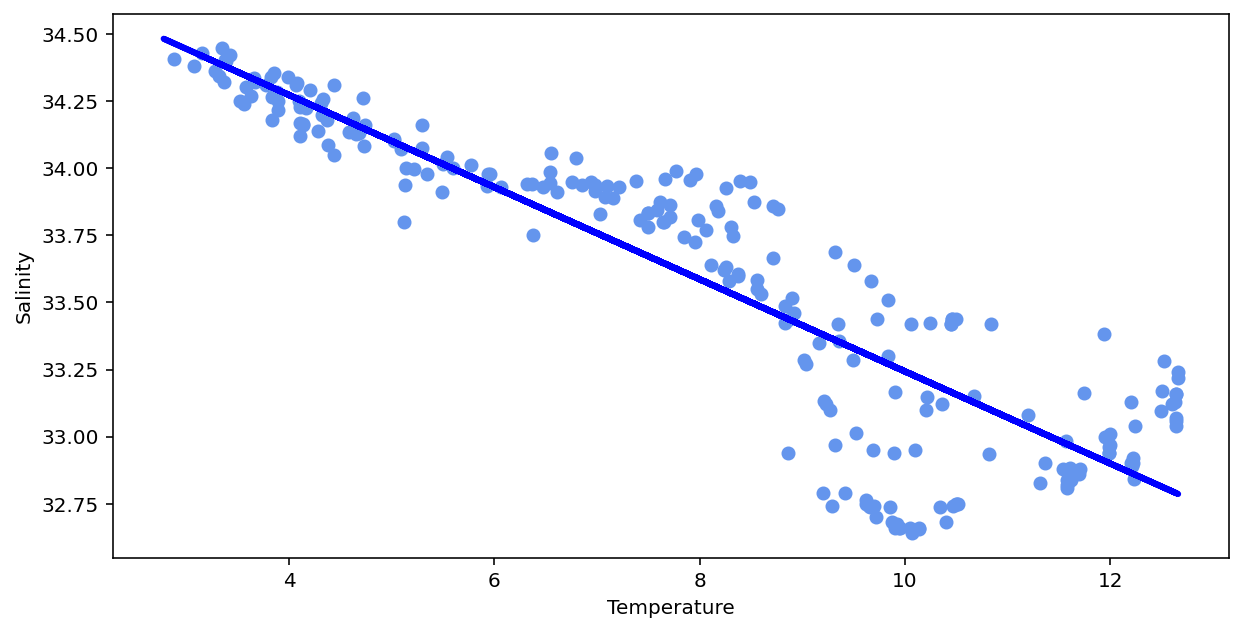

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='cornflowerblue')
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("Temperature")
plt.ylabel("Salinity")

### Exercise 2

For example, we want to study the trend of fuel consumption as a function of the engine capacity, we can collect our measures in a table like the following.

| Engine capacity (cm$^3$) | Average Consumption (l/100km) |
|---|----|
| $800$  |  $6$    | 
| $1000$ |  $7.5$  | 
| $1100$ |  $8$    | 
| $1200$ |  $8.7$  | 
| $1600$ |  $12.4$ | 
| $2000$ |  $16$   | 
| $3000$ |  $20$   | 
| $4500$ |  $28$   | 

Apply linear regression to find the average consumption of an engine with `test_capacity = 1800`.

Use both `sklearn` library and the gradient descent functions we defined in lectures and compare the results.

_Hint for data conversion._ Recall that one may use pandas and python dictionaries to create dataframes.

```python
measures = pd.DataFrame({'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28], 
                         'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500]})
```

In [9]:
measures = pd.DataFrame({'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28], 
                         'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500]})

In [10]:
lr = LinearRegression()
lr.fit(measures['Capacity'].values.reshape(-1, 1), measures['Consumption_avg'])

LinearRegression()

In [18]:
test_capacity = np.array([18.0]).reshape(-1, 1)
print(f"The average consumption of an engine with {test_capacity[0,0]} cm3 is {lr.predict(test_capacity)[0]:.2f}")

The average consumption of an engine with 18.0 cm3 is 12.73


### Gradient Descent

In [19]:
x = measures.Capacity
y = measures.Consumption_avg

# reshaping of X
X = np.ones((len(x), 2))
X[:,1] = x

In [20]:
# parameters 
max_iterations = 1500 
alpha = 0.01 # learing rate

# adding initial β = (0,0)
beta = np.zeros(2)

In [21]:
def computeCost(X, y, beta):
    """
        (array of float, array of float, array of float) -> float
        
        :return: the value of squared-difference cost function.
    """
    n = len(y)
    cost = np.dot((np.dot(X,beta) - y ), (np.dot(X,beta) - y ))/(2*n) # complete here
    return cost

In [22]:
# Gradient descent algorithm
def gradientDescent(X, y, beta, alpha, max_iterations, cost_thr = 1e-5):
    """
        (array of float, array of float, float, int, [float]) -> array of float, array of float, float
        
        :return: the following tuple:
            - array of parameters beta
            - array of beta[1] for each step
            - cost function
    """
    
    n = len(y)
    # cost = np.zeros(max_iterations)
    cost = []
    betaMod = beta.copy()
    # betaHist = np.zeros(max_iterations)
    beta0Hist = []
    beta1Hist = []
    
    for i in range(max_iterations):                                             # complete here (the student has to write 
        betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n # down this for-loop)
        beta0Hist.append(betaMod[0])
        beta1Hist.append(betaMod[1])        
        # cost[i] = computeCost(X, y, betaMod)
        cost.append(computeCost(X, y, betaMod))
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    beta0Hist = np.array(beta0Hist)
    beta1Hist = np.array(beta1Hist)
    betaHist = [beta0Hist, beta1Hist]
    
    return betaMod, betaHist, cost, i

In [23]:
betaFit, betaHist, cost, iterations = gradientDescent(X, y, beta, alpha, max_iterations)  

/var/folders/gc/5dj19dqj64ddh8_sw790yqtr0000gn/T/ipykernel_89676/1657613626.py:28: RuntimeWarning: invalid value encountered in double_scalars
  if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
/var/folders/gc/5dj19dqj64ddh8_sw790yqtr0000gn/T/ipykernel_89676/1657613626.py:21: RuntimeWarning: invalid value encountered in subtract
  betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n # down this for-loop)


You can see there is something weird going on. Some warnings appeared.

Let's plot $J(\beta)$ as function of $\beta_1$ and of the iteration number.

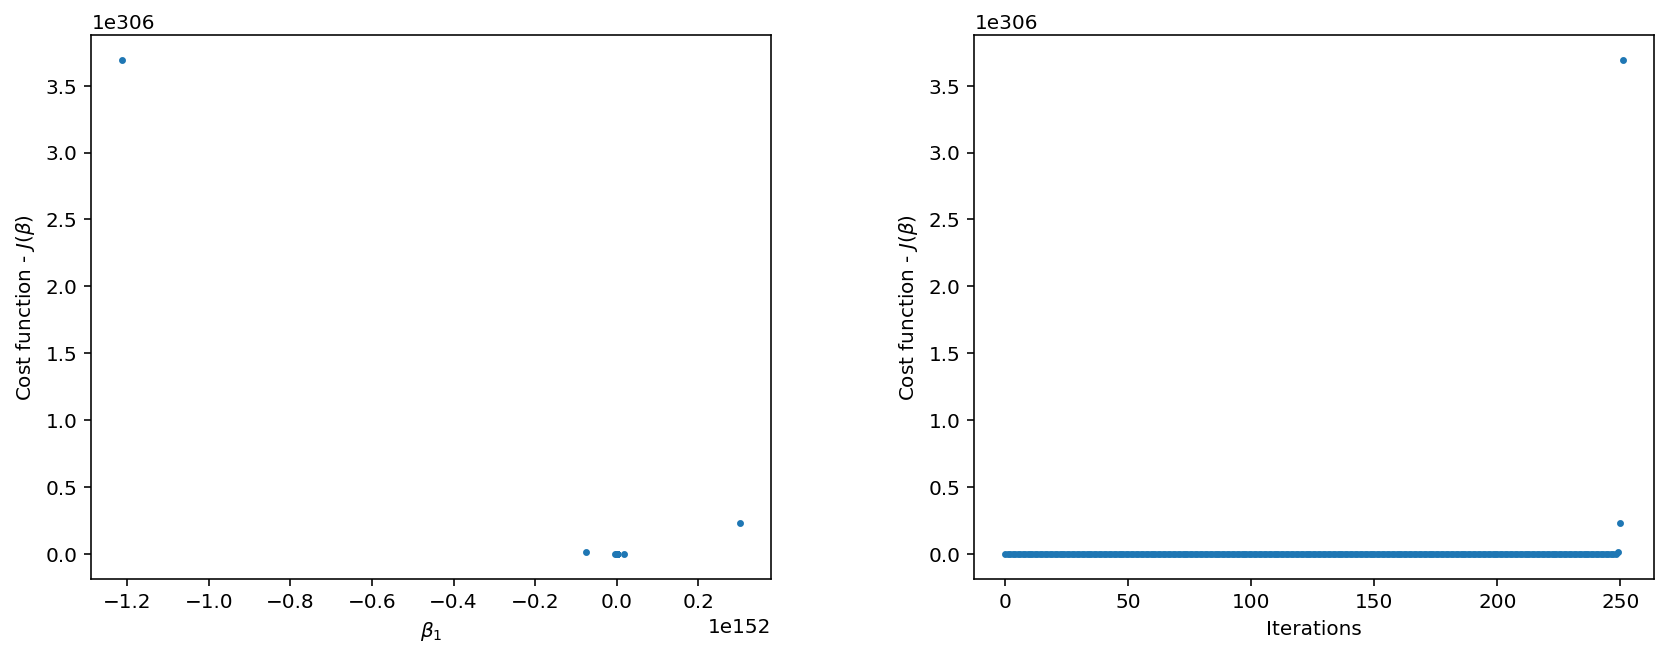

In [24]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimization path:
ax1.scatter(betaHist[1], cost,  marker='o', s=6)
ax1.set_xlabel(r'$\beta_1$')
ax1.set_ylabel(r"Cost function - $J(\beta)$");

# Cost-Iterations plot:
ax2.scatter(np.arange(len(cost)), cost,  marker='o', s=6)
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"Cost function - $J(\beta)$");

In [25]:
def linearFit(value):
    return betaFit[0] + betaFit[1] * value

In [26]:
linFit = linearFit(test_capacity[0,0])

In [27]:
print('Your predicted consumption with sklearn: %.10f' %lr.predict(test_capacity)[0])
print('Your predicted consumption with your linearFit: %.10f' %linFit)
print('You should get approximatively: 12.73')

Your predicted consumption with sklearn: 12.7292780749
Your predicted consumption with your linearFit: nan
You should get approximatively: 12.73


Why? =)